In [1]:
from astropy.table import Table

t = Table.read("PsfFlux_flux_numbers.fits")

{1, 100, 4, 6, 10, 12, 16, 17, 18, 22, 23, 24, 25}


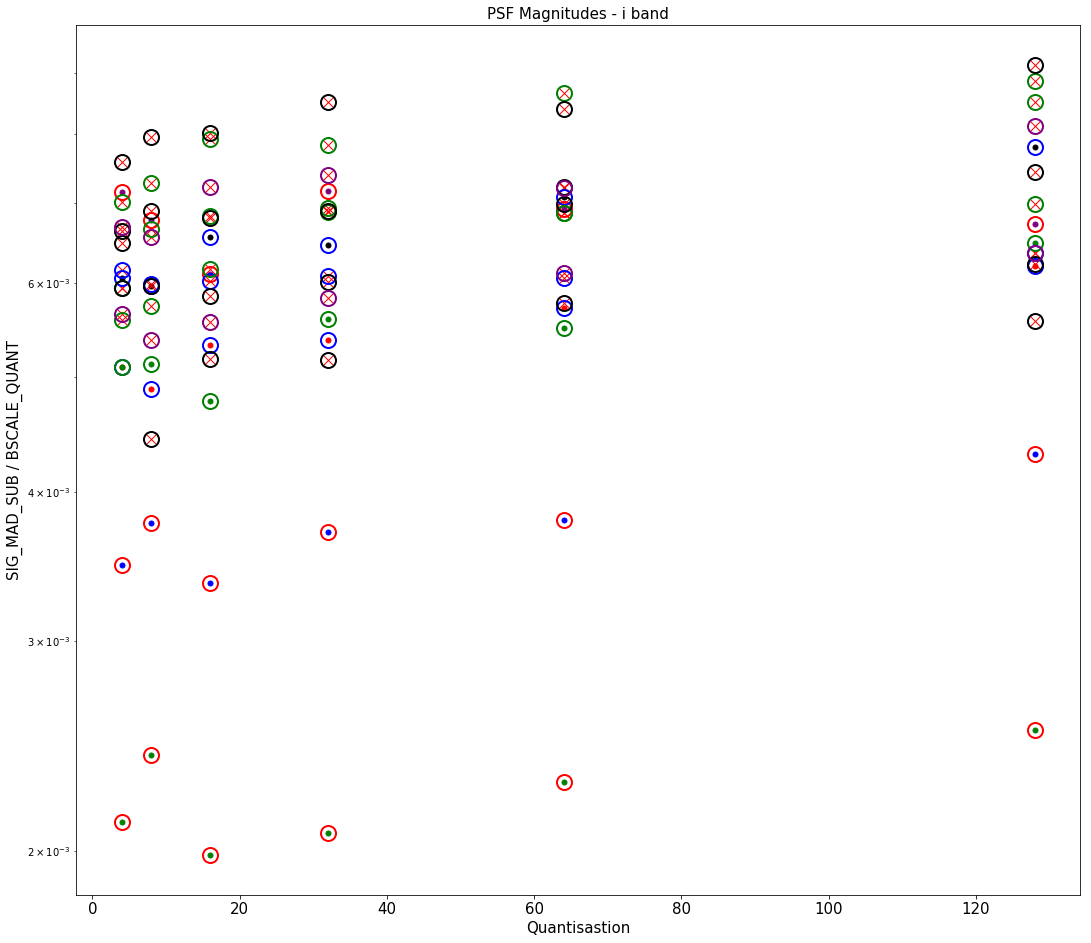

In [6]:
import numpy as np
import matplotlib.pyplot as plt

mags = np.where((t["TYPE"] == "MAG") & (t["FILTER"] == "HSC-I") & (t["CCD"] != 999) & \
                (t["VISIT"] != 999))[0]
t_plot = t[mags]
ccds = set(list(t_plot["CCD"]))

fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(111)

ccd_colours = ["r", "g", "b", "k", "purple"]
ccd_ms = [".", "x", "+"]
i = 0
j = 0
c = 0
for ccd in ccds:
    ids = np.where((t_plot["CCD"] == ccd))[0]
    ax.plot(t_plot["QUANT"][ids], t_plot["SIG_MAD_SUB"][ids]/t_plot["BSCALE_QUANT"][ids], \
             marker=ccd_ms[i], color=ccd_colours[j], ms=10, lw=0)
    if c < len(ccd_colours)-1:
        j += 1
    elif c == len(ccd_colours)-1:
        j = 0
        i += 1
    c += 1
print(set(list(t_plot["CCD"])))
visit_colours = ["r", "b", "g", "k", "purple"]
for (i, visit) in enumerate(set(list(t_plot["VISIT"]))):
    ids = np.where((t_plot["VISIT"] == visit))[0]
    ax.plot(t_plot["QUANT"][ids], (t_plot["SIG_MAD_SUB"][ids]/t_plot["BSCALE_QUANT"][ids]), \
             "o", mfc="none", ms=15, mec=visit_colours[i], mew=2)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
plt.yscale("log")
plt.title("PSF Magnitudes - i band", fontsize=15)
plt.xlabel("Quantisastion", fontsize=15)
plt.ylabel("SIG_MAD_SUB / BSCALE_QUANT", fontsize=15)
plt.show()